In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import seaborn as sns, pandas as pd, numpy as np, matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


## Exploratory Data Analysis

### Importing data

In [2]:
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake01'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (10834, 18).




,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
df.pop('ID')

0            0
1            1
2            2
3            3
4            4
         ...  
10829    10829
10830    10830
10831    10831
10832    10832
10833    10833
Name: ID, Length: 10834, dtype: int64

### Checking for ranges and invalid values

In [4]:
COLUMNS = df.columns.tolist()
for c in COLUMNS:
    if df[c].isnull().values.any():
        print('{0}: {1} invalid values found'.format(c, df[c].isnull().sum()))
    else:
        print('{0}: ok'.format(c))

Area: ok
Perimeter: ok
MajorAxisLength: ok
MinorAxisLength: ok
AspectRation: ok
Eccentricity: ok
ConvexArea: ok
EquivDiameter: ok
Extent: ok
Solidity: ok
roundness: ok
Compactness: ok
ShapeFactor1: ok
ShapeFactor2: ok
ShapeFactor3: ok
ShapeFactor4: ok
y: ok


In [5]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
y                   object
dtype: object

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


No rows are incomplete. All columns seems to have very different scales for the ranges of the features, so they will have to be normalized.

P.S. Different scales will likely affect the performance of th ML model.

In [7]:
df.duplicated().sum()

0

Let's see if the categories are balanced.

In [8]:
df.y.value_counts(sort=True, normalize=True)

DERMASON    0.261861
SIRA        0.194665
SEKER       0.149622
HOROZ       0.137345
CALI        0.120362
BARBUNYA    0.097563
BOMBAY      0.038582
Name: y, dtype: float64

The categories are not very balanced.

In [9]:
#df.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

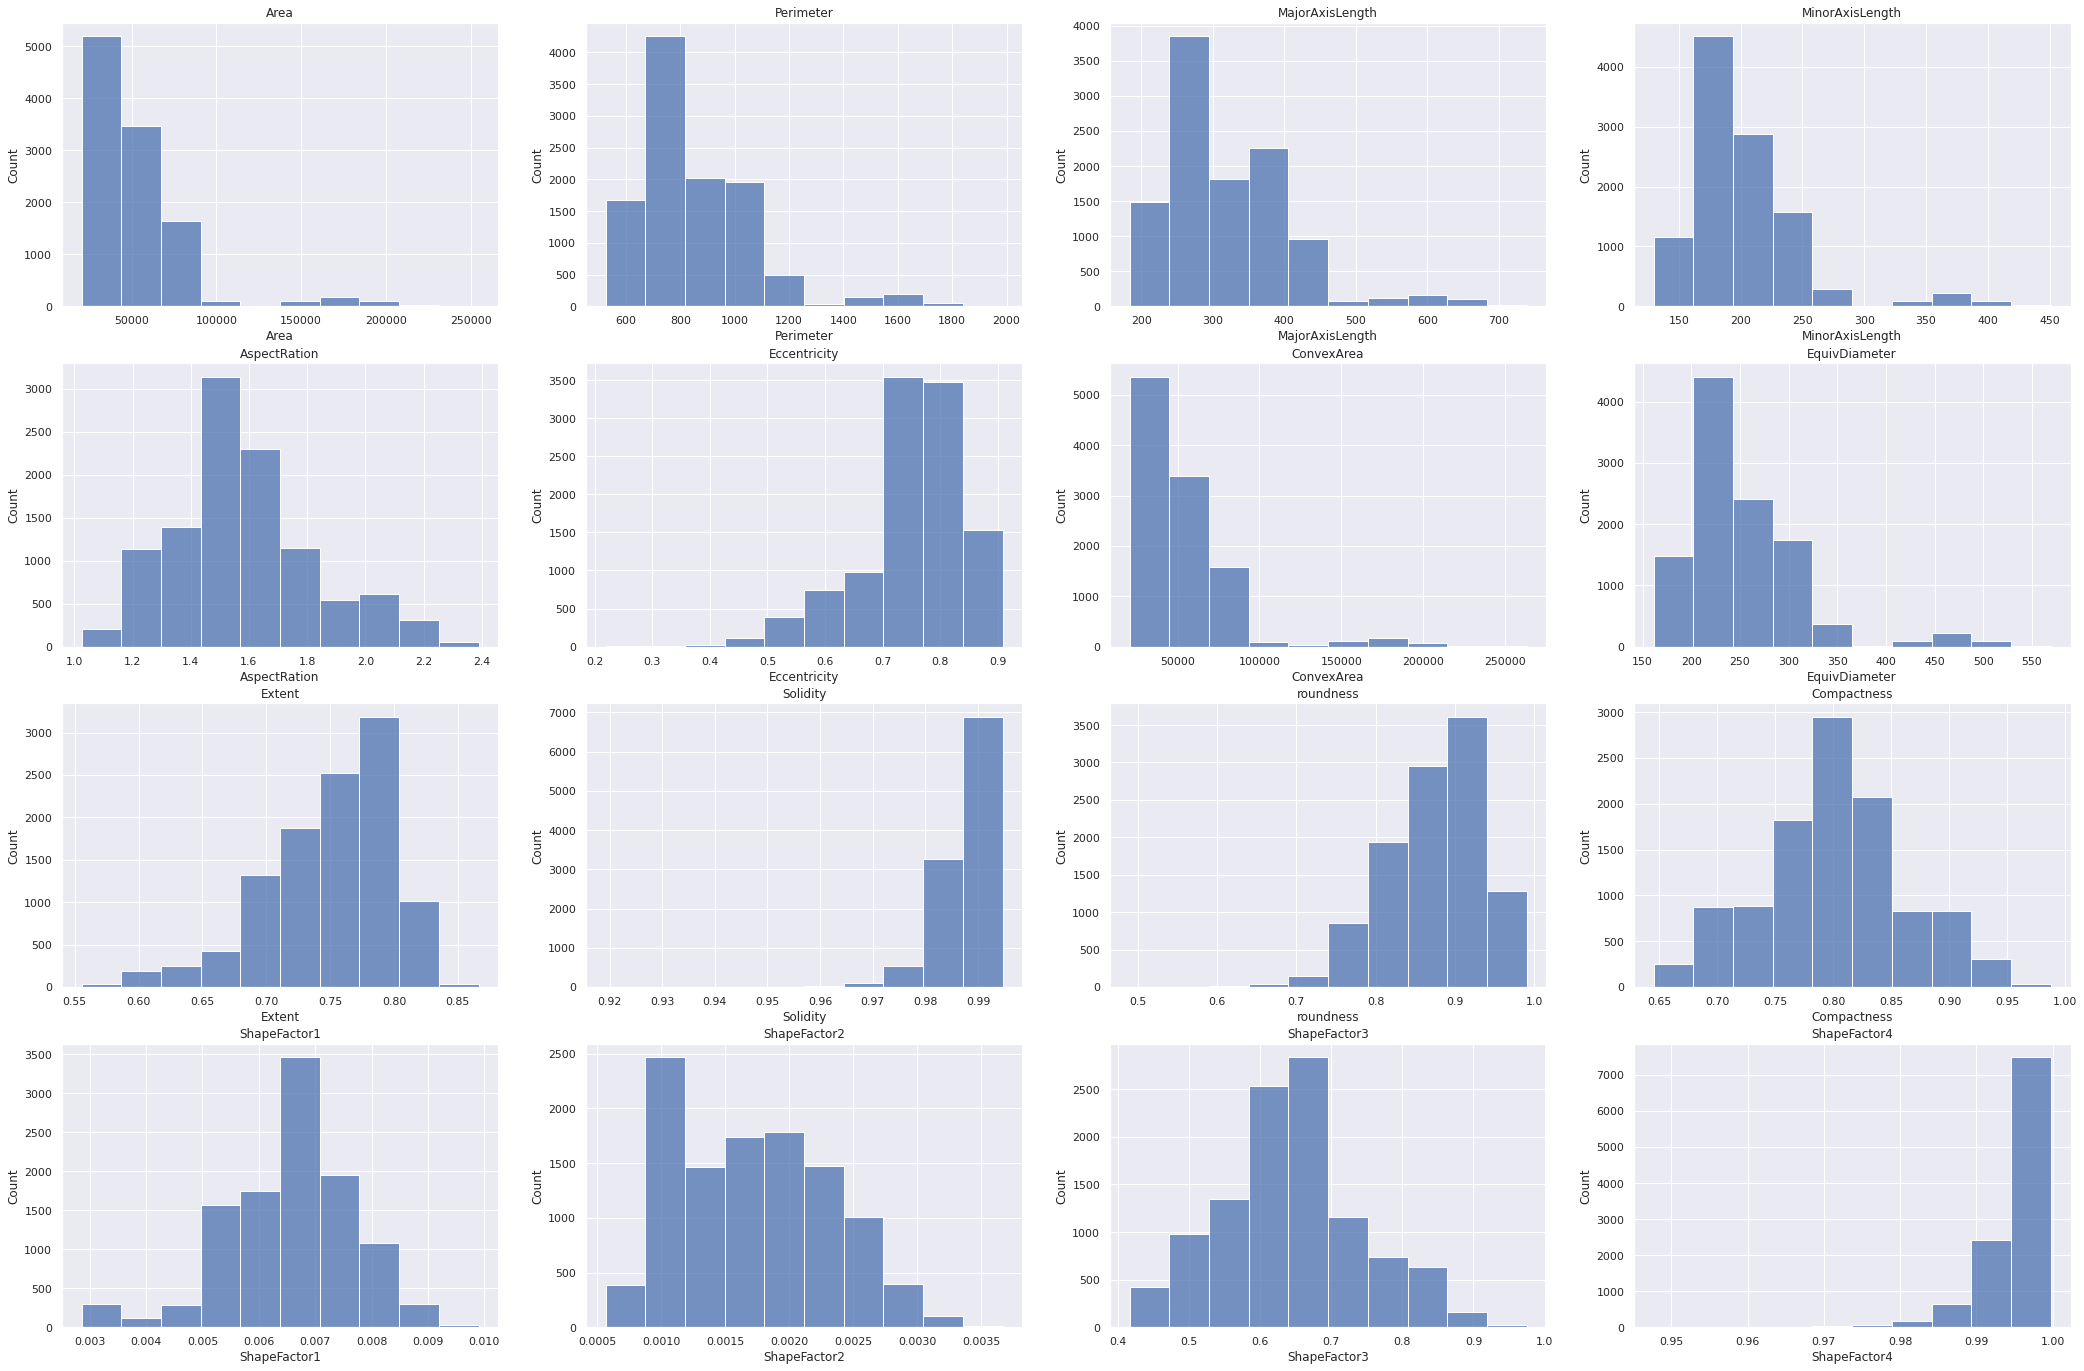

In [10]:
feature_cols = COLUMNS[:-1]
sns.set(style='darkgrid')
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,24))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(df, x=name, bins=10, ax=ax).set(title=name)

There appear to be a few individuals whose solidity is considerably larger than the rest.

In [11]:
df.sort_values(['Solidity'], ascending=False)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
4066,137358,1364.645,507.985890,345.222852,1.471472,0.733591,138093,418.198084,0.798073,0.994677,0.926882,0.823247,0.003698,0.001048,0.677736,0.997270,BOMBAY
2131,71014,1012.162,401.813230,226.776061,1.771850,0.825514,71424,300.695582,0.668021,0.994260,0.871071,0.748347,0.005658,0.001095,0.560023,0.992276,CALI
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
9828,154364,1481.350,556.152885,353.852824,1.571707,0.771482,155283,443.330970,0.813058,0.994082,0.883976,0.797139,0.003603,0.000897,0.635430,0.998710,BOMBAY
9559,72725,1017.952,399.724443,232.622991,1.718336,0.813219,73168,304.296477,0.746541,0.993945,0.881940,0.761266,0.005496,0.001139,0.579525,0.995819,CALI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,68377,1089.552,405.312884,222.293463,1.823323,0.836184,72153,295.059825,0.622838,0.947667,0.723809,0.727980,0.005928,0.001027,0.529955,0.966280,HOROZ
9411,57783,970.455,380.671967,201.902548,1.885424,0.847757,61035,271.240854,0.643134,0.946719,0.771008,0.712532,0.006588,0.001047,0.507701,0.957233,HOROZ
1845,32142,908.265,243.527936,172.123401,1.414845,0.707422,33954,202.297962,0.723495,0.946634,0.489618,0.830697,0.007577,0.002225,0.690058,0.976325,DERMASON
1221,47542,876.316,338.453506,186.822466,1.811632,0.833852,50332,246.033238,0.706335,0.944568,0.777975,0.726934,0.007119,0.001226,0.528433,0.957325,HOROZ


### Encoding

Let's encode our class labels.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['y'] = le.fit_transform(df.y)
df['y']

0        4
1        5
2        3
3        3
4        6
        ..
10829    5
10830    3
10831    2
10832    6
10833    3
Name: y, Length: 10834, dtype: int64

Let us see if there is any correlation between variables.

### Correlation

In [13]:
# Calculate the correlation values
corr_values = df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

,feature1,feature2,correlation,abs_correlation
5,Area,ConvexArea,0.999940,0.999940
112,Compactness,ShapeFactor3,0.998684,0.998684
20,Perimeter,EquivDiameter,0.991439,0.991439
60,AspectRation,Compactness,-0.987664,0.987664
75,ConvexArea,EquivDiameter,0.985223,0.985223
6,Area,EquivDiameter,0.984987,0.984987
73,Eccentricity,ShapeFactor3,-0.980946,0.980946
63,AspectRation,ShapeFactor3,-0.978550,0.978550
15,Perimeter,MajorAxisLength,0.977830,0.977830
70,Eccentricity,Compactness,-0.970173,0.970173


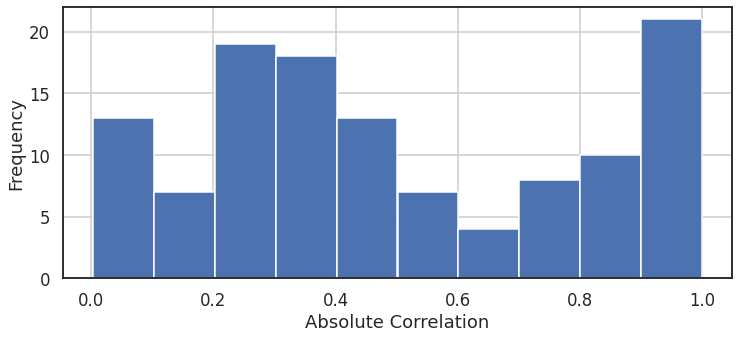

In [14]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=10, figsize=(12, 5))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

# The most highly correlated values
corr_values.sort_values('abs_correlation', ascending=False).query('abs_correlation>0.8')

In [15]:
df.corrwith(df['y']).sort_values(ascending=False)[:17]

y                  1.000000
ShapeFactor1       0.392398
roundness          0.387003
ShapeFactor2       0.338889
Solidity           0.327622
ShapeFactor4       0.172578
ShapeFactor3       0.172462
Compactness        0.161121
Extent            -0.034010
AspectRation      -0.121283
Eccentricity      -0.204183
MajorAxisLength   -0.456807
MinorAxisLength   -0.457526
Area              -0.474164
ConvexArea        -0.476363
EquivDiameter     -0.480921
Perimeter         -0.507765
dtype: float64

Before continuing, we will scale our X columns to values between zero and one, using the Yeo-Johnson transformation and the standard scaler.

In [16]:
feature_columns = [x for x in df.columns if x not in ['y']]

skew_columns = (df[feature_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.8]
skew_columns

Area               2.970246
ConvexArea         2.960315
MinorAxisLength    2.251468
EquivDiameter      1.971378
Perimeter          1.650773
MajorAxisLength    1.390286
dtype: float64

In [17]:
from scipy.stats import yeojohnson

# Apply transformation to long-tailed columns
yeoj = dict()
yeoj_fields = ['ShapeFactor4', 'Solidity', 'Eccentricity', 'roundness']
yeoj_fields = yeoj_fields
for f in yeoj_fields:
    yeoj[f] = yeojohnson(df[f])
    df[f] = yeoj[f][0]
    print("{0} transformed with lambda {1}".format(f, yeoj[f][1]))

ShapeFactor4 transformed with lambda 346.7539357533598
Solidity transformed with lambda 251.2403065454217
Eccentricity transformed with lambda 7.670190741928225
roundness transformed with lambda 8.699798633841414


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [18]:
from sklearn.preprocessing import StandardScaler

for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

sc = StandardScaler()
df[feature_columns] = sc.fit_transform(df[feature_columns])

In [19]:
#%matplotlib inline
#plt.close()
#sns.set_style('whitegrid')
#sns.pairplot(df, hue='y', height=3)
#plt.show()

At first sight, it would seem that it will be possible to split our beans into different classes from their attributes alone.

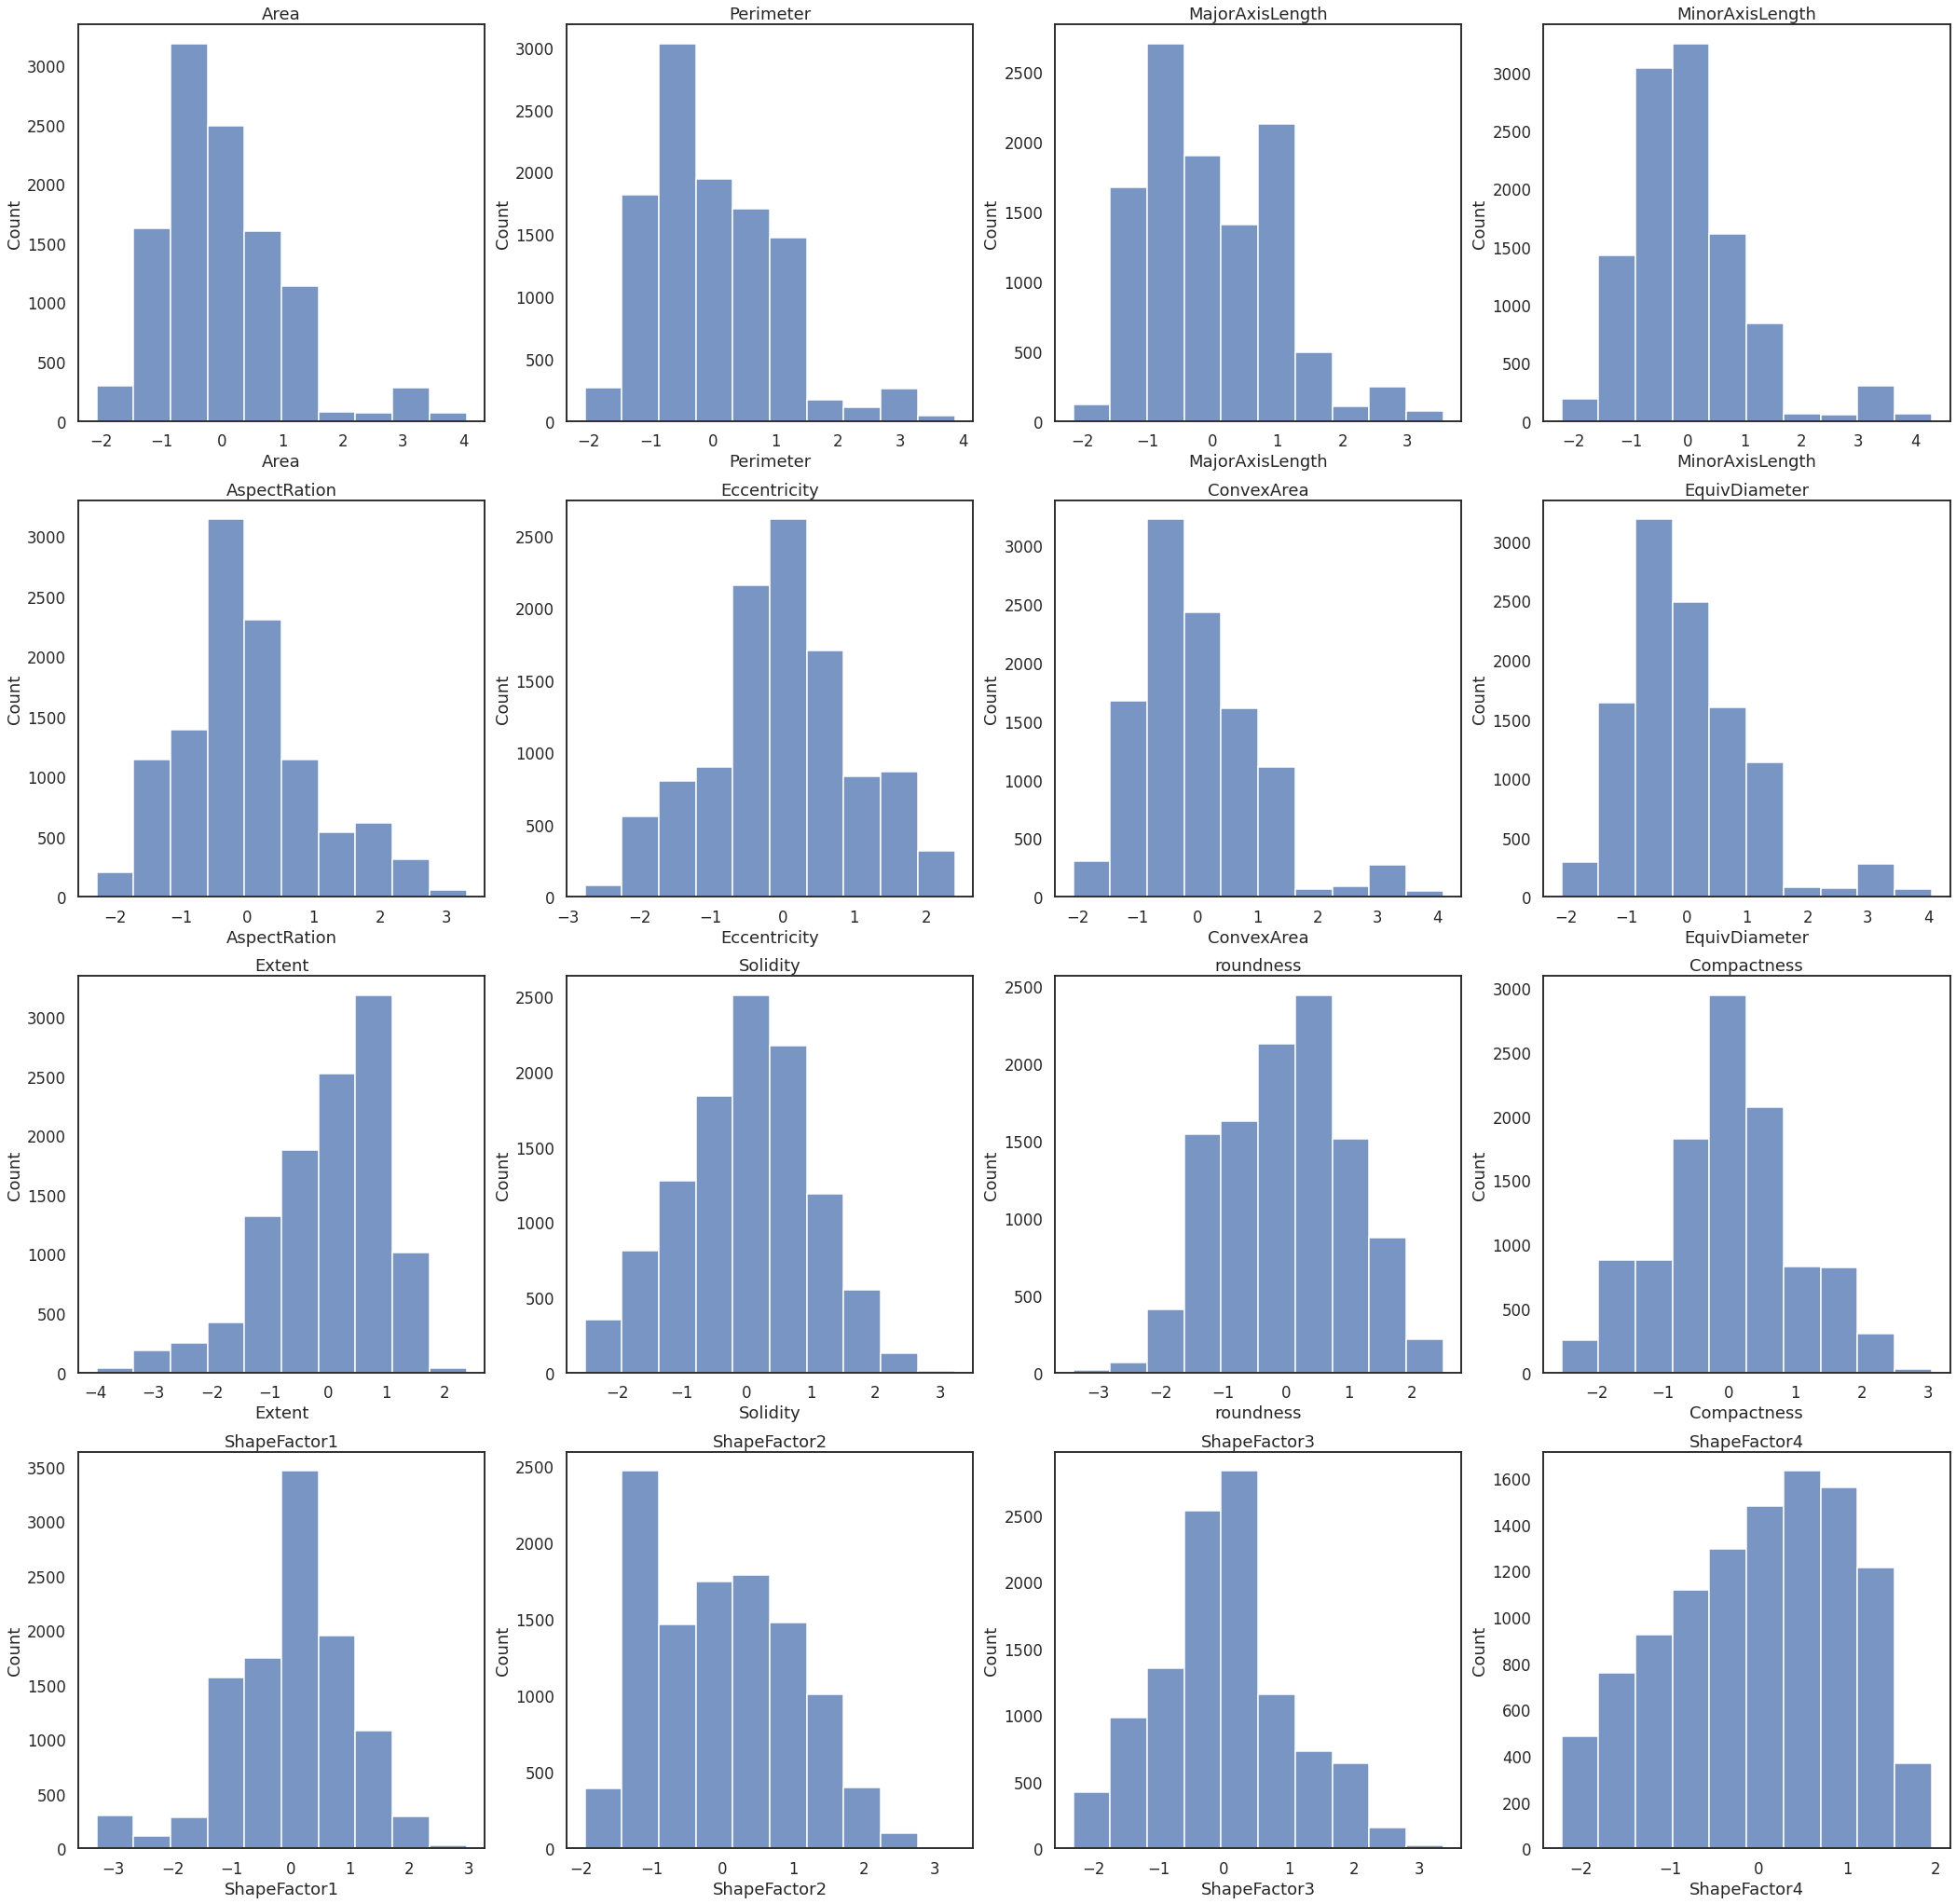

In [20]:
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,36))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(df, x=name, bins=10, ax=ax).set(title=name)

In [21]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0.466319,0.686026,1.010258,-0.309443,2.224308,1.873985,0.464115,0.465866,-2.966134,-0.193326,-1.535032,-1.873127,0.231513,-1.328445,-1.772230,1.203833,4
1,-0.186833,-0.419842,-0.631816,0.393666,-1.391835,-1.598741,-0.203254,-0.187142,0.445540,2.815329,2.068409,1.570313,-0.526343,1.109856,1.621877,0.547394,5
2,-1.014981,-1.075596,-1.046468,-0.852537,-0.642144,-0.608062,-1.014998,-1.014577,1.051566,0.090459,1.009579,0.599206,0.902962,0.970037,0.573092,0.729914,3
3,-0.522199,-0.560545,-0.588210,-0.390370,-0.502811,-0.438613,-0.525276,-0.522296,0.330964,0.310659,0.454221,0.448979,0.322302,0.483610,0.417275,1.616281,3
4,-0.297711,-0.316488,-0.398762,-0.137106,-0.515832,-0.454222,-0.299973,-0.297961,-0.411095,0.103196,0.154003,0.445159,0.046731,0.328421,0.413335,0.161787,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,-0.585768,-0.671100,-0.875582,-0.151484,-1.158653,-1.279049,-0.590043,-0.585813,0.420498,0.519546,0.902709,1.247915,0.055872,1.171445,1.265712,0.714856,5
10830,-0.975007,-0.982412,-0.914806,-0.934570,-0.355019,-0.264802,-0.973893,-0.974654,-0.370439,-0.071480,0.514906,0.273955,1.010442,0.671241,0.237909,0.683329,3
10831,1.293219,1.223426,1.370444,1.025027,0.879797,0.951132,1.279119,1.293034,0.450680,1.249380,-0.418043,-0.917823,-1.116522,-1.205589,-0.921288,-0.566140,2
10832,0.007091,-0.033237,-0.006006,0.023405,-0.112764,0.006676,0.003939,0.006703,-1.490112,0.100082,0.122513,-0.001391,-0.121563,-0.157706,-0.039535,-0.452703,6


In [22]:
# let's have a look at how many lables each var has
for col in df.columns:
    print(col, ': ', len(df[col].unique()), 'lables')

Area :  9794 lables
Perimeter :  10712 lables
MajorAxisLength :  10834 lables
MinorAxisLength :  10834 lables
AspectRation :  10834 lables
Eccentricity :  10834 lables
ConvexArea :  9908 lables
EquivDiameter :  9794 lables
Extent :  10830 lables
Solidity :  10824 lables
roundness :  10834 lables
Compactness :  10834 lables
ShapeFactor1 :  10834 lables
ShapeFactor2 :  10834 lables
ShapeFactor3 :  10834 lables
ShapeFactor4 :  10834 lables
y :  7 lables


## Splitting data

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio.

Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument **random_state** in the following command

In [23]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df,
                                    test_size=0.2,
                                    random_state=42,
                                    shuffle=True)

X_train = train_df.drop(columns=['y'])
y_train = train_df['y']

X_val = val_df.drop(columns=['y'])
y_val = val_df['y']

## Model Training

Let's train a model with the data! We'll train a simple Neural Network and use it as our baseline.

Note: This is a good place to change the model and get better performance. Try to change the arguments of the MLPClassifier below! For example set max_iter to 1000 instead of the defualt value of 200. You can also use different classifiers like KNeighborsClassifier and DecisionTreeClassifier.

In [24]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the classifier
classifier = MLPClassifier(alpha=0.01, random_state=42)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
from sklearn.metrics import f1_score

print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.9400092293493308


0.9400092293493308

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file.

First, we'll load the data.

In [26]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [27]:
#test_df.pop('ID')

In [28]:
COLUMNS = test_df.columns.tolist()
for c in COLUMNS:
    if test_df[c].isnull().values.any():
        print('{0}: {1} invalid values found'.format(c, test_df[c].isnull().sum()))
    else:
        print('{0}: ok'.format(c))

ID: ok
Area: ok
Perimeter: ok
MajorAxisLength: ok
MinorAxisLength: ok
AspectRation: ok
Eccentricity: ok
ConvexArea: ok
EquivDiameter: ok
Extent: ok
Solidity: ok
roundness: ok
Compactness: ok
ShapeFactor1: ok
ShapeFactor2: ok
ShapeFactor3: ok
ShapeFactor4: ok


In [29]:
test_df.duplicated().sum()

0

In [30]:
from scipy.stats import yeojohnson

# Apply transformation to long-tailed columns
yeoj = dict()
yeoj_fields = ['ShapeFactor4', 'Solidity', 'Eccentricity', 'roundness']
yeoj_fields = yeoj_fields
for f in yeoj_fields:
    yeoj[f] = yeojohnson(test_df[f])
    test_df[f] = yeoj[f][0]
    print("{0} transformed with lambda {1}".format(f, yeoj[f][1]))

ShapeFactor4 transformed with lambda 353.13539214522797
Solidity transformed with lambda 255.34232076886326
Eccentricity transformed with lambda 7.5187842854814315
roundness transformed with lambda 8.310667957784583


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [31]:
for col in skew_columns.index.tolist():
    test_df[col] = np.log1p(test_df[col])

sc = StandardScaler()
test_df[feature_columns] = sc.fit_transform(test_df[feature_columns])

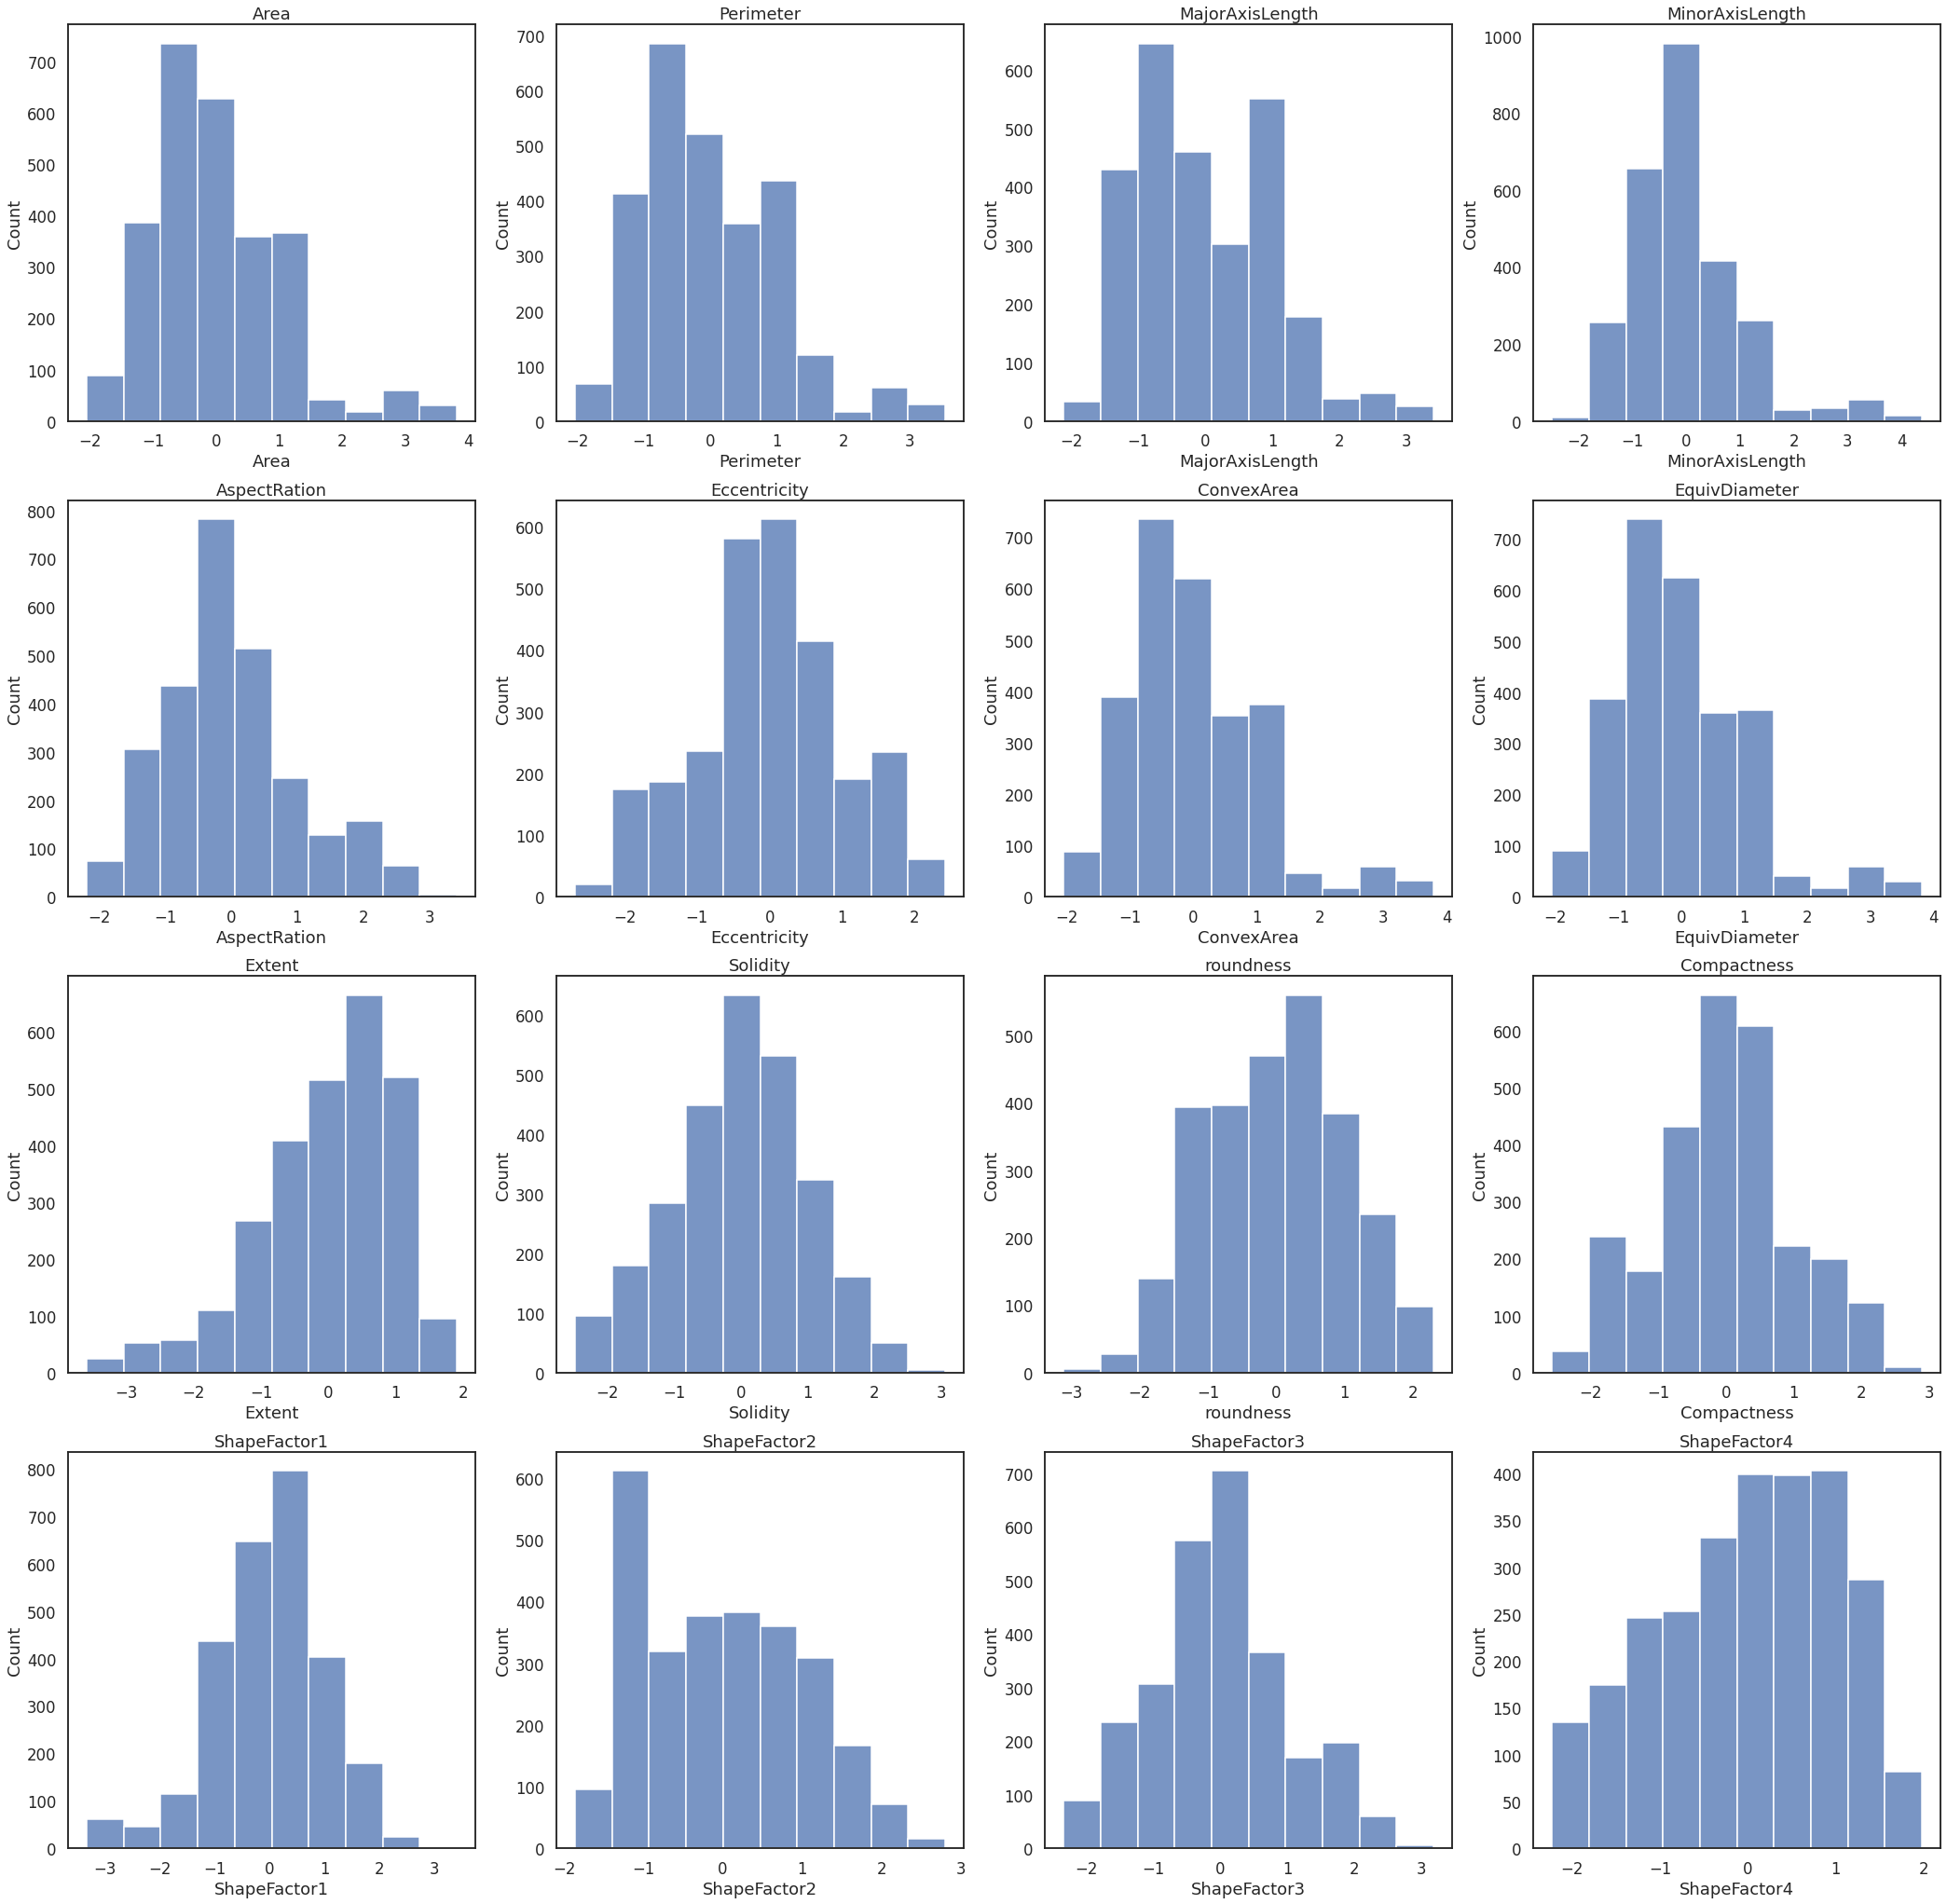

In [32]:
fig, ax_list = plt.subplots(nrows=4, ncols=4, sharey=False, figsize=(36,36))
ax_list = ax_list.flatten()
for name, ax in zip(feature_cols, ax_list):
     g = sns.histplot(test_df, x=name, bins=10, ax=ax).set(title=name)

In [33]:
X_test = test_df.drop(columns=['ID'])

y_test_predicted = le.inverse_transform(classifier.predict(X_test))

test_df['y'] = y_test_predicted

test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,0.449415,0.617304,0.917266,-0.040609,1.574149,1.465258,0.520613,0.448971,-2.630036,-2.443900,-1.311976,-1.635066,0.137431,-1.220581,-1.566085,-2.220520,HOROZ
1,10835,-1.236822,-1.223517,-1.203910,-1.122759,-0.559338,-0.502558,-1.234821,-1.236153,0.369306,-0.100693,0.559077,0.503557,1.249880,1.058825,0.473333,0.857630,DERMASON
2,10836,0.320600,0.406565,-0.007090,0.691585,-0.867677,-0.892243,0.340039,0.320155,0.073899,-1.738573,-0.848615,0.857490,-0.806440,0.215384,0.845135,-0.190684,BARBUNYA
3,10837,-1.594543,-1.604914,-1.492574,-1.521660,-0.525747,-0.461751,-1.592675,-1.593284,-0.672618,0.053037,1.039732,0.469294,1.805730,1.326188,0.437856,1.227261,DERMASON
4,10838,2.633152,2.411908,2.148626,2.910368,-0.269399,-0.161393,2.625099,2.634374,1.129210,-0.263594,-0.212157,0.141397,-2.514860,-1.234272,0.102967,-1.188669,BOMBAY


In [34]:
test_df[['ID', 'y']].to_csv('./submission.csv', index=False)